<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this homework notebook, please modify only the cells that start with:</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells. To test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>

## The Poisson-binomial Distribution

In the binomial distribution, $n$ Bernoulli variables $X_1,...,X_n$ are distributed 
independently $\sim B(p)$ with the same success probability $p$,
and $X=\sum_{i=1}^n X_i$. We have seen that 
$$P(X=k)=\binom nk \cdot p^k\cdot \overline p^{n-k}.$$

In the Poisson-binomial distribution, again $n$ Bernoulli variables (sometimes called
<i>Poisson trials</i>) are distributed independently, and again $X=\sum_{i=1}^n X_i$.
However, now each $X_i\sim B(p_i)$ where the $p_i$'s may differ. 

For the Poisson-binomial distribution, $P(X=k)$ does not have a simple formula, but it can be 
computed numerically. One way is to determine all $k$-subsets of 
$\{1,...,n\}$, and for each such subset $S$ claculate the
probability that $X_i$ is $1$ iff $i\in S$, and then sum these probabilities. 

For example, for $[p_1,p_2,p_3]=[0.4, 0.3, 0.8]$, and $k=2$. 
The $2$-subsets of $\{1,2,3\}$ and the corresponding probabilties that $X_i$ is one iff $i$ is in the subset are

$$
\{1,2\}\quad 0.024\\
\{1,3\}\quad 0.224\\
\{2,3\}\quad 0.144\\
$$
hence,
$$P(X=k)=0.024+0.224+0.144=0.392.$$

### Exercise 1

Using the above method , write a function **pmf_sum** that takes a vector $\boldsymbol p=[p_1, p_2, \ldots, p_n]$ of length $\ge 1$ and a natural number $k$, and outputs $P(X=k)$.

<font  style="color:blue"> * **Sample run:** *</font>
```python
pmf_sum([0.4, 0.3, 0.8], 2)
```

<font  style="color:magenta"> * **Expected Output:** *</font>
```
0.392
```

In [65]:
# modify this cell
    ### BEGIN SOLUTION
import itertools
import numpy as np
def pmf_sum(p, k):
    # inputs: p is a list of integers and k is an integer
    # output: a variable of type 'float'
    #pc = 1.0 - p
    S = {i for i in range(0,len(p))}
    s = list(set(itertools.combinations(S,k)))
    #print(s)
    pmf_cell = []
    for el in s:
        pkt = 1.0
        for i in el:
            pkt = pkt*p[int(i)]
            #print(pkt)
        compl = list(S - set(el)) 
        #print(compl)
        for j in compl:
            pkt = pkt*(1.0-p[int(j)])
            #print(pkt)
        pmf_cell.append(pkt)
        #print(pmf_cell)
    pmf_arr = np.asarray(pmf_cell,dtype=np.float64)
    #print(pmf_arr)
    pmf = np.sum(pmf_arr)
    ### END SOLUTION
    return pmf
# modify this cell

In [ ]:
# Check Function

assert abs(pmf_sum([0.2, 0.3, 0.4, 0.1], 2)-0.2144)<1e-1
assert abs(pmf_sum([0.7, 0.7, 0.8,0.3,0.1], 4)-0.1463)<1e-1

In [3]:
f = [i for i in range(0,3)]
s = list(set(itertools.combinations(f,2)))

In [4]:
d = set(f) - set(s[0])

In [38]:
p = pmf_sum([0.1,0.6,0.8,0.6,0.2,0.6,0.3],3)

[  1.03680000e-03   5.80608000e-02   2.68800000e-04   4.30080000e-03
   4.60800000e-04   1.65888000e-02   1.61280000e-03   3.62880000e-03
   2.68800000e-04   1.61280000e-03   4.60800000e-04   4.30080000e-03
   4.30080000e-03   9.67680000e-03   7.16800000e-04   1.22880000e-03
   2.76480000e-03   5.80608000e-02   4.60800000e-04   9.67680000e-03
   9.67680000e-03   1.65888000e-02   1.03680000e-03   5.80608000e-02
   2.68800000e-04   1.65888000e-02   6.22080000e-03   1.61280000e-03
   6.22080000e-03   2.17728000e-02   6.22080000e-03   3.62880000e-03
   3.62880000e-03   1.03680000e-03   7.68000000e-05]


In [60]:
##<font>Visulaization-Part(Matplotlib)</font>
np.zeros(shape=(1,20))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [49]:
%matplotlib inline

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
sns.set(color_codes = True)

In [79]:
def plot_points(p):
    n = len(p)+1
    x = np.zeros(shape = (1,n))
    for i in range(n):
        x[0][i] = pmf_sum(p,i)
    return x[0]    

In [101]:
y = plot_points([0.1,0.6,0.8,0.6,0.2,0.6,0.3,0.8,0.6,0.2,0.8,0.6,0.2,0.8,0.6,0.2,0.8,0.6,0.2])

In [102]:
x = np.arange(len(y))

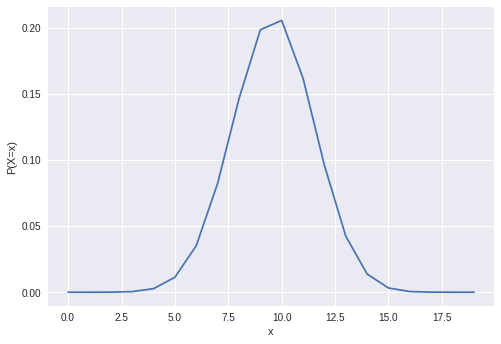

In [103]:
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.plot(x,y)

<Container object of 3 artists>

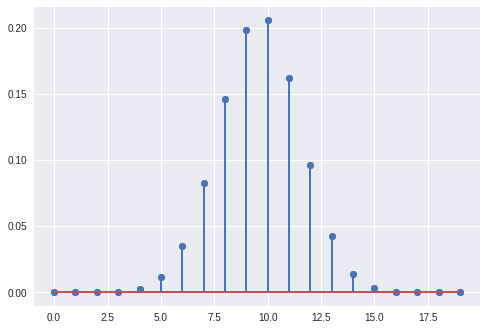

In [107]:
from matplotlib.pyplot import stem

stem(y, linefmt='b-', markerfmt='bo', basefmt='r-')
stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')